In [2]:
import pandas as pd
df_tweets = pd.read_csv('C:/Users/jr24440/Downloads/twitter-map_Climate_Change.csv')

In [3]:
import pandas as pd
df_tweets_misinfo = pd.read_csv('C:/Users/jr24440/Downloads/twitter-map_Climate_Change_Misinformation.csv')

In [3]:
print(df_tweets_misinfo.head())

                                                text  \
0  DEFCON 5: “We have an imperative to build a ‘p...   
1  I am not @nytimes. I saw policemen breaking cc...   
2  The United States receives no oil from Lybia. ...   
3  I already know ⁦@NYGovCuomo⁩ is going to blame...   
4  While the AP reported on the sluggish jobs rep...   

                                        text_cleaned  retweet_count  \
0  DEFCON 5: “We have an imperative to build a ‘p...           4620   
1  I am not @nytimes. I saw policemen breaking cc...           2773   
2  The United States receives no oil from Lybia. ...           1700   
3  I already know ⁦@NYGovCuomo⁩ is going to blame...           2182   
4  While the AP reported on the sluggish jobs rep...          14684   

     local_time                                            tweetId   id_  
0  1.593780e+12  http://twitter.com/i/web/status/12790213512868...  BFVo  
1  1.584030e+12  http://twitter.com/i/web/status/12381547141910...  MF/e  
2  1.299520

In [4]:
import pandas as pd

# Assuming your DataFrame is named df
# Convert local_time from Unix time (milliseconds) to datetime
df_tweets['local_time'] = pd.to_datetime(df_tweets['local_time'], unit='ms')

# Filter the DataFrame to keep only rows from 2012 onwards
df_filtered = df_tweets[df_tweets['local_time'].dt.year >= 2012]

# Display the filtered DataFrame
print(df_filtered)


                                             text_cleaned  retweet_count  \
0       DEFCON 5: “We have an imperative to build a ‘p...           4620   
1                                     Its all happening .           1638   
3       The moon is in Aries and it is full. People ar...           3051   
4       energy flows where our intention goes.... CREA...          10464   
6       Dear Nigerians in Nigeria Save the country if ...           2112   
...                                                   ...            ...   
288466  Changing the date on ur paper to a few days ea...           1306   
288468  School starts, it's time for me to be better t...           1603   
288469  EVERYTHING IS ALREADY IMPROVING SOMEHOW MY BOO...           1401   
288470  everyone is using face tune to see what they l...          11058   
288471  Do the work. Fuck everything else. Just do the...           3500   

                                                     text          local_time  \
0     

In [5]:
import pandas as pd

# Assuming your DataFrame is named df
# Convert local_time from Unix time (milliseconds) to datetime
df_tweets_misinfo['local_time'] = pd.to_datetime(df_tweets_misinfo['local_time'], unit='ms')

# Filter the DataFrame to keep only rows from 2012 onwards
df_filtered_misinfo = df_tweets_misinfo[df_tweets_misinfo['local_time'].dt.year >= 2012]

# Display the filtered DataFrame
print(df_filtered_misinfo)

                                                     text  \
0       DEFCON 5: “We have an imperative to build a ‘p...   
1       I am not @nytimes. I saw policemen breaking cc...   
3       I already know ⁦@NYGovCuomo⁩ is going to blame...   
4       While the AP reported on the sluggish jobs rep...   
5       not ONE sentence in this piece abt how the pre...   
...                                                   ...   
373399  Unlike this moronic @NRA tweet, mine is not ma...   
373400  Ayotte’s ‘no’ vote helps defeat background che...   
373401  Nobel secretary regrets Obama peace prize - BB...   
373402  the surest sign there's an election soon -- ca...   
373403  In the last nine months of Trump’s presidency ...   

                                             text_cleaned  retweet_count  \
0       DEFCON 5: “We have an imperative to build a ‘p...           4620   
1       I am not @nytimes. I saw policemen breaking cc...           2773   
3       I already know ⁦@NYGovCuomo⁩ is

In [7]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Instantiate the analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to determine sentiment based on the compound score
def get_sentiment(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to each dataset's text column
df_filtered['sentiment'] = df_filtered['text_cleaned'].apply(get_sentiment)
df_filtered_misinfo['sentiment'] = df_filtered_misinfo['text_cleaned'].apply(get_sentiment)

# Optional: Print out counts of each sentiment category for each dataset
print("Sentiment counts in df_tweets_2012:")
print(df_filtered['sentiment'].value_counts())

print("\nSentiment counts in df_misinformation_2012:")
print(df_filtered_misinfo['sentiment'].value_counts())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jr24440\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\jr24440\AppData\Local\Temp\ipykernel_15756\1152692721.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment'] = df_filtered['text_cleaned'].apply(get_sentiment)


Sentiment counts in df_tweets_2012:
sentiment
positive    109572
negative     79902
neutral      58390
Name: count, dtype: int64

Sentiment counts in df_misinformation_2012:
sentiment
negative    188653
positive    115326
neutral      46040
Name: count, dtype: int64


C:\Users\jr24440\AppData\Local\Temp\ipykernel_15756\1152692721.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_misinfo['sentiment'] = df_filtered_misinfo['text_cleaned'].apply(get_sentiment)


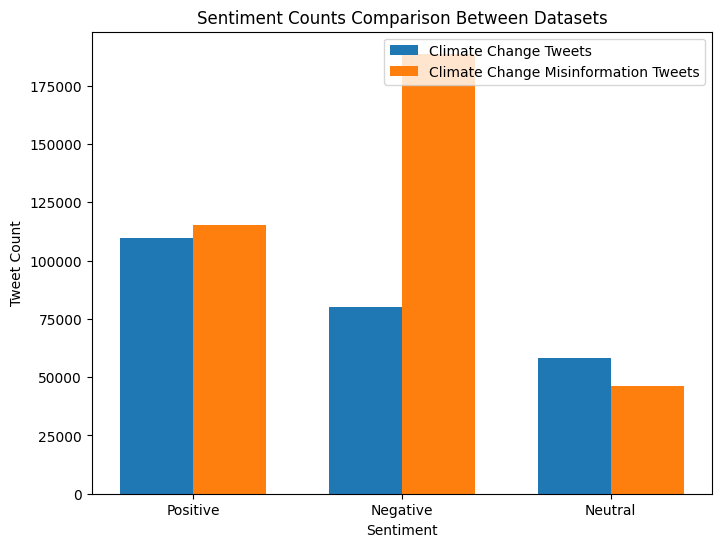

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the sentiment counts for each dataset
counts_tweets = {'Positive': 109576, 'Negative': 79910, 'Neutral': 58378}
counts_misinfo = {'Positive': 115340, 'Negative': 188664, 'Neutral': 46015}

# Create a DataFrame from the counts for easier plotting
df_counts = pd.DataFrame({
    'df_tweets_2012': counts_tweets,
    'df_misinformation_2012': counts_misinfo
})
df_counts.index.name = 'Sentiment'
df_counts = df_counts.reset_index()

# Create the grouped bar chart
x = np.arange(len(df_counts['Sentiment']))  # positions for sentiment categories
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, df_counts['df_tweets_2012'], width, label='Climate Change Tweets')
rects2 = ax.bar(x + width/2, df_counts['df_misinformation_2012'], width, label='Climate Change Misinformation Tweets')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Sentiment')
ax.set_ylabel('Tweet Count')
ax.set_title('Sentiment Counts Comparison Between Datasets')
ax.set_xticks(x)
ax.set_xticklabels(df_counts['Sentiment'])
ax.legend()

plt.show()


C:\Users\jr24440\AppData\Local\Temp\ipykernel_15756\4164795333.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['local_time'] = pd.to_datetime(df_filtered['local_time'])
C:\Users\jr24440\AppData\Local\Temp\ipykernel_15756\4164795333.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_misinfo['local_time'] = pd.to_datetime(df_filtered_misinfo['local_time'])


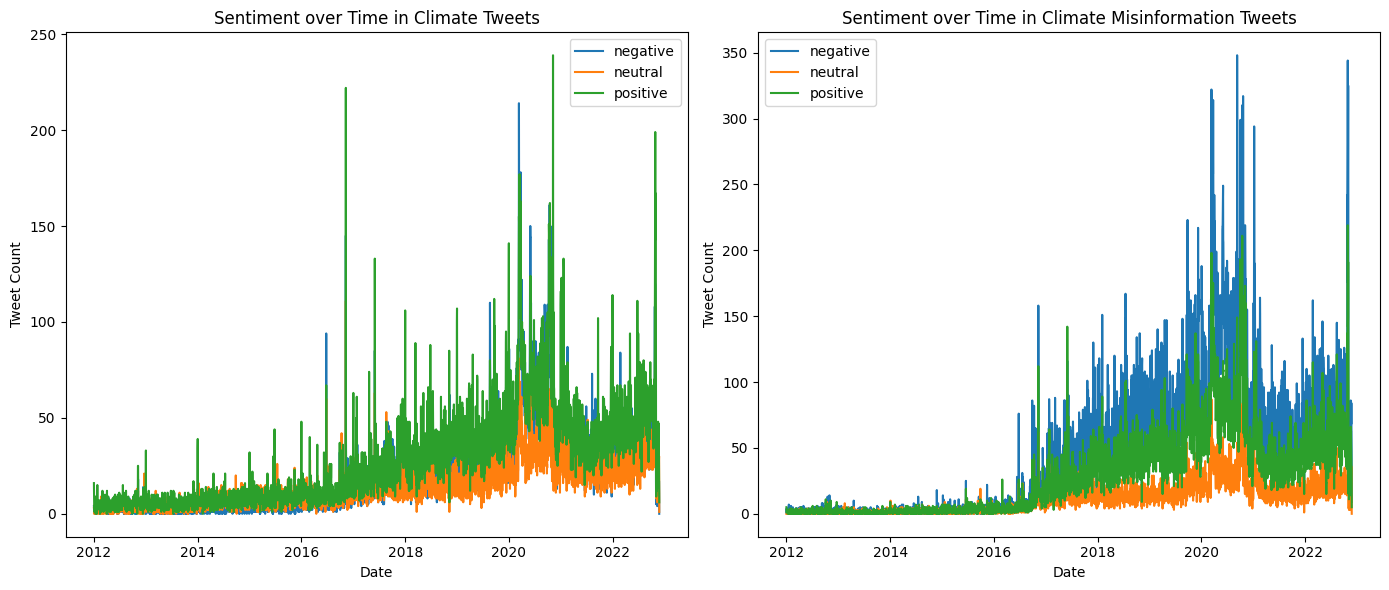

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the local_time column to datetime if not already done
df_filtered['local_time'] = pd.to_datetime(df_filtered['local_time'])
df_filtered_misinfo['local_time'] = pd.to_datetime(df_filtered_misinfo['local_time'])

# Group by day and sentiment, then count the tweets in each group
tweets_grouped = df_filtered.groupby([pd.Grouper(key='local_time', freq='D'), 'sentiment']).size().unstack(fill_value=0)
misinfo_grouped = df_filtered_misinfo.groupby([pd.Grouper(key='local_time', freq='D'), 'sentiment']).size().unstack(fill_value=0)

# Create subplots for each dataset
plt.figure(figsize=(14, 6))

# Plot for df_tweets_2012
plt.subplot(1, 2, 1)
for sentiment in tweets_grouped.columns:
    plt.plot(tweets_grouped.index, tweets_grouped[sentiment], label=sentiment)
plt.title('Sentiment over Time in Climate Tweets')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend()

# Plot for df_misinformation_2012
plt.subplot(1, 2, 2)
for sentiment in misinfo_grouped.columns:
    plt.plot(misinfo_grouped.index, misinfo_grouped[sentiment], label=sentiment)
plt.title('Sentiment over Time in Climate Misinformation Tweets')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\jr24440\AppData\Local\Temp\ipykernel_15756\2049667608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['local_time'] = pd.to_datetime(df_filtered['local_time'])
C:\Users\jr24440\AppData\Local\Temp\ipykernel_15756\2049667608.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_misinfo['local_time'] = pd.to_datetime(df_filtered_misinfo['local_time'])


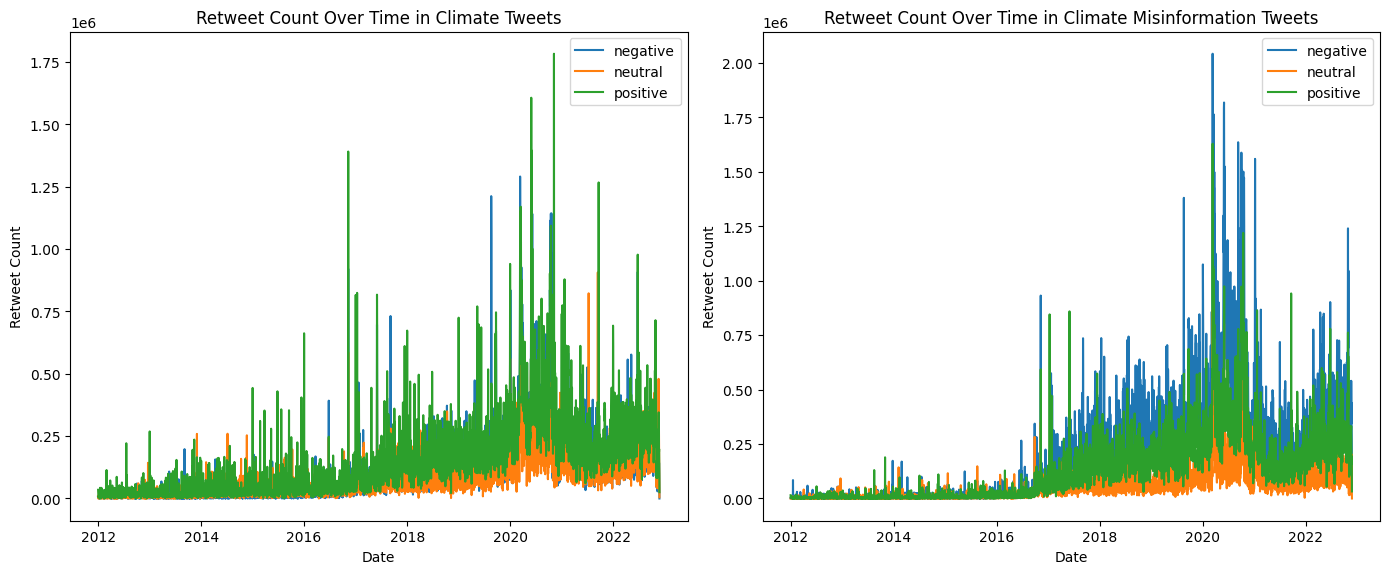

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the local_time column is datetime
df_filtered['local_time'] = pd.to_datetime(df_filtered['local_time'])
df_filtered_misinfo['local_time'] = pd.to_datetime(df_filtered_misinfo['local_time'])

# Group by day and sentiment and sum the retweet counts
tweets_retweets = df_filtered.groupby([pd.Grouper(key='local_time', freq='D'), 'sentiment'])['retweet_count'].sum().unstack(fill_value=0)
misinfo_retweets = df_filtered_misinfo.groupby([pd.Grouper(key='local_time', freq='D'), 'sentiment'])['retweet_count'].sum().unstack(fill_value=0)

# Set up the plot
plt.figure(figsize=(14, 6))

# Plot for df_tweets_2012
plt.subplot(1, 2, 1)
for sentiment in tweets_retweets.columns:
    plt.plot(tweets_retweets.index, tweets_retweets[sentiment], label=sentiment)
plt.title('Retweet Count Over Time in Climate Tweets')
plt.xlabel('Date')
plt.ylabel('Retweet Count')
plt.legend()

# Plot for df_misinformation_2012
plt.subplot(1, 2, 2)
for sentiment in misinfo_retweets.columns:
    plt.plot(misinfo_retweets.index, misinfo_retweets[sentiment], label=sentiment)
plt.title('Retweet Count Over Time in Climate Misinformation Tweets')
plt.xlabel('Date')
plt.ylabel('Retweet Count')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
Consumer = pd.read_csv('C:/Users/jr24440/Downloads/UMCSENT.csv')

In [23]:
print(Consumer.head())

  observation_date  UMCSENT
0       1952-11-01     86.2
1       1952-12-01      NaN
2       1953-01-01      NaN
3       1953-02-01     90.7
4       1953-03-01      NaN


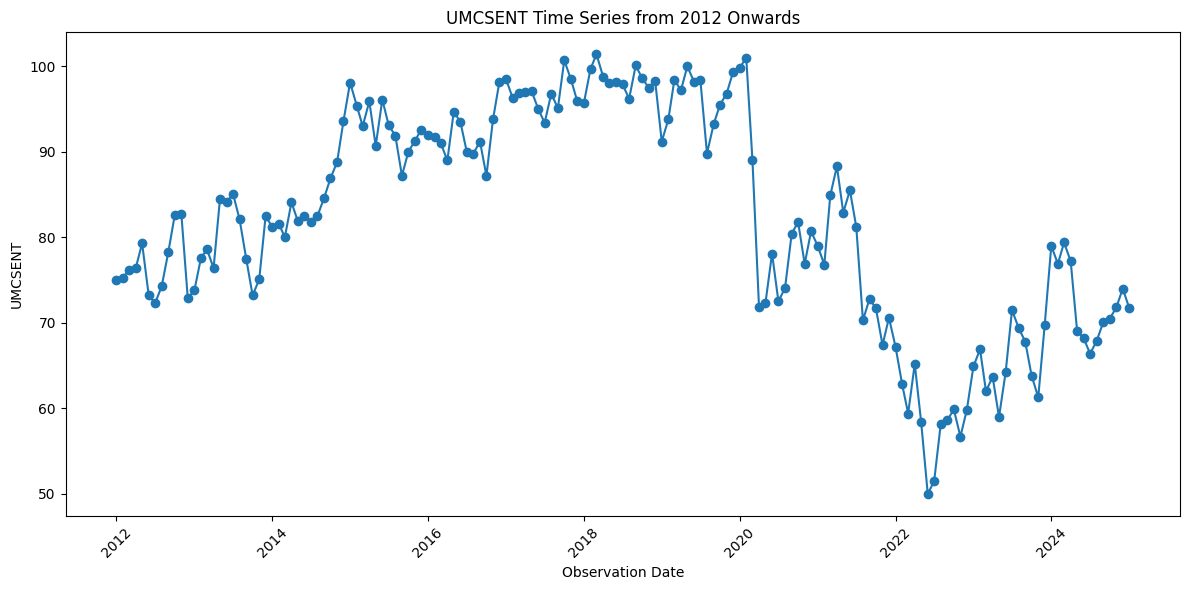

In [35]:
# Convert observation_date to datetime
Consumer['observation_date'] = pd.to_datetime(Consumer['observation_date'])

# Filter the DataFrame to only include rows from 2012 onwards
Consumer_2012 = Consumer[Consumer['observation_date'] >= '2012-01-01'].copy()

# Optionally, drop rows where UMCSENT is NaN
Consumer_2012 = Consumer_2012.dropna(subset=['UMCSENT'])

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(Consumer_2012['observation_date'], Consumer_2012['UMCSENT'], marker='o', linestyle='-')
plt.xlabel('Observation Date')
plt.ylabel('UMCSENT')
plt.title('UMCSENT Time Series from 2012 Onwards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
VIX = pd.read_csv('C:/Users/jr24440/Downloads/VIX_History.csv')

In [26]:
print(VIX.head())

         DATE   OPEN   HIGH    LOW  CLOSE
0  01/02/1990  17.24  17.24  17.24  17.24
1  01/03/1990  18.19  18.19  18.19  18.19
2  01/04/1990  19.22  19.22  19.22  19.22
3  01/05/1990  20.11  20.11  20.11  20.11
4  01/08/1990  20.26  20.26  20.26  20.26


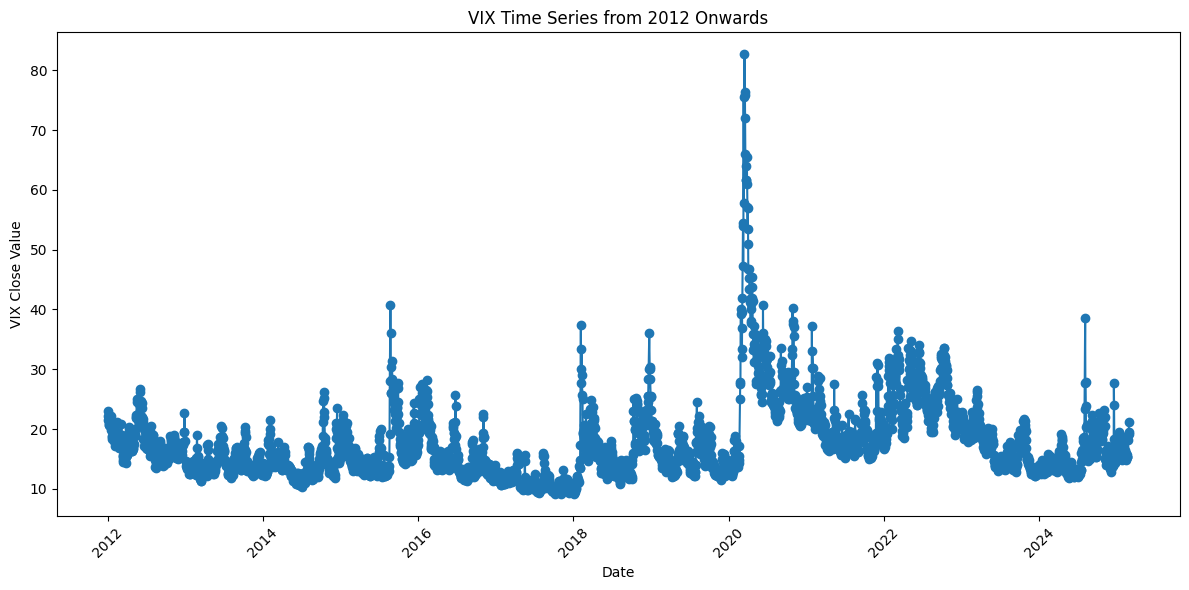

In [27]:
# Convert the DATE column to datetime (assuming the format is MM/DD/YYYY)
VIX['DATE'] = pd.to_datetime(VIX['DATE'], format='%m/%d/%Y')

# Filter the DataFrame to only include data from 2012 onwards
vix_2012 = VIX[VIX['DATE'] >= '2012-01-01'].copy()

# Optionally, drop rows where the CLOSE value is NaN
vix_2012 = vix_2012.dropna(subset=['CLOSE'])

# Plot the time series of the VIX CLOSE values
plt.figure(figsize=(12, 6))
plt.plot(vix_2012['DATE'], vix_2012['CLOSE'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('VIX Close Value')
plt.title('VIX Time Series from 2012 Onwards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [29]:
ESG = pd.read_excel('C:/Users/jr24440/Downloads/merged_dataset_ESG.xlsx')

In [33]:

# --- Step 1. Prepare Each Dataset as a Monthly Time Series ---

# (a) VIX data: convert DATE to datetime and resample to monthly average of CLOSE


vix_monthly = vix_2012.set_index('DATE').resample('ME')['CLOSE'].mean().reset_index()
vix_monthly.rename(columns={'CLOSE': 'VIX_CLOSE'}, inplace=True)
vix_monthly = vix_monthly[['DATE', 'VIX_CLOSE']]

In [37]:

# (b) Consumer sentiment: load and filter from 2012 onward (assuming observation_date is monthly)

consumer_monthly = Consumer_2012.rename(columns={'observation_date': 'DATE', 'UMCSENT': 'UMCSENT'})
consumer_monthly = consumer_monthly[['DATE', 'UMCSENT']]

In [38]:

# (c) Tweets retweet counts: assume tweets_retweets is a DataFrame with a datetime index and sentiment columns.
# Here we sum across sentiments to get a daily total, then resample to monthly.
tweets_retweets['total_retweets'] = tweets_retweets.sum(axis=1)
tweets_monthly = tweets_retweets.resample('ME').sum()[['total_retweets']].reset_index()
tweets_monthly.rename(columns={'total_retweets': 'TWEETS_RETWEETS'}, inplace=True)
tweets_monthly['DATE'] = tweets_monthly['local_time']
tweets_monthly = tweets_monthly[['DATE', 'TWEETS_RETWEETS']]

In [39]:

# (d) Misinformation retweet counts: same idea.
misinfo_retweets['total_retweets'] = misinfo_retweets.sum(axis=1)
misinfo_monthly = misinfo_retweets.resample('ME').sum()[['total_retweets']].reset_index()
misinfo_monthly.rename(columns={'total_retweets': 'MISINFO_RETWEETS'}, inplace=True)
misinfo_monthly['DATE'] = misinfo_monthly['local_time']
misinfo_monthly = misinfo_monthly[['DATE', 'MISINFO_RETWEETS']]

In [40]:

# (e) Tweets counts: assume tweets_grouped is a DataFrame with a datetime index and sentiment columns.
tweets_grouped['total_tweets'] = tweets_grouped.sum(axis=1)
tweets_grouped_monthly = tweets_grouped.resample('ME').sum()[['total_tweets']].reset_index()
tweets_grouped_monthly.rename(columns={'total_tweets': 'TWEETS_COUNT'}, inplace=True)
tweets_grouped_monthly['DATE'] = tweets_grouped_monthly['local_time']
tweets_grouped_monthly = tweets_grouped_monthly[['DATE', 'TWEETS_COUNT']]

In [41]:

# (f) Misinformation tweet counts:
misinfo_grouped['total_tweets'] = misinfo_grouped.sum(axis=1)
misinfo_grouped_monthly = misinfo_grouped.resample('ME').sum()[['total_tweets']].reset_index()
misinfo_grouped_monthly.rename(columns={'total_tweets': 'MISINFO_COUNT'}, inplace=True)
misinfo_grouped_monthly['DATE'] = misinfo_grouped_monthly['local_time']
misinfo_grouped_monthly = misinfo_grouped_monthly[['DATE', 'MISINFO_COUNT']]

In [42]:
# Shift each date to the last day of its month
consumer_monthly['DATE'] = consumer_monthly['DATE'] + pd.offsets.MonthEnd(0)

# Check the updated dates
print(consumer_monthly.head())


          DATE  UMCSENT
710 2012-01-31     75.0
711 2012-02-29     75.3
712 2012-03-31     76.2
713 2012-04-30     76.4
714 2012-05-31     79.3


In [63]:
print(vix_monthly.head())

        DATE  VIX_CLOSE
0 2012-01-31  20.228000
1 2012-02-29  18.420500
2 2012-03-31  16.167273
3 2012-04-30  17.823000
4 2012-05-31  21.001818


In [64]:

# --- Step 2. Merge All Monthly DataFrames on DATE ---

# Merge consumer sentiment with VIX data
df_merged = consumer_monthly.merge(vix_monthly, on='DATE', how='inner')

# Merge tweet engagement measures (if some dates are missing, use left join and later fill NAs)
df_merged = df_merged.merge(tweets_monthly, on='DATE', how='left')
df_merged = df_merged.merge(misinfo_monthly, on='DATE', how='left')
df_merged = df_merged.merge(tweets_grouped_monthly, on='DATE', how='left')
df_merged = df_merged.merge(misinfo_grouped_monthly, on='DATE', how='left')

# Create a 'year' column for fixed effects (from the DATE)
df_merged['year'] = df_merged['DATE'].dt.year

# Fill missing values with 0 (or consider an appropriate imputation)
df_merged.fillna(0, inplace=True)

# Optional: inspect the merged DataFrame
print(df_merged.head())

# --- Step 3. Run the Time Series Regression with Year Fixed Effects ---

# We use an OLS regression where UMCSENT is the dependent variable and the regressors include:
# VIX_CLOSE, TWEETS_RETWEETS, MISINFO_RETWEETS, TWEETS_COUNT, MISINFO_COUNT,
# and we include year fixed effects via dummy variables (C(year)).
formula = 'UMCSENT ~ VIX_CLOSE + TWEETS_RETWEETS + MISINFO_RETWEETS + TWEETS_COUNT + MISINFO_COUNT + C(year)'

model = smf.ols(formula=formula, data=df_merged).fit()
print(model.summary())


        DATE  UMCSENT  VIX_CLOSE  TWEETS_RETWEETS  MISINFO_RETWEETS  \
0 2012-01-31     75.0  20.228000         809373.0          355529.0   
1 2012-02-29     75.3  18.420500         863297.0          350014.0   
2 2012-03-31     76.2  16.167273        1186335.0          346674.0   
3 2012-04-30     76.4  17.823000         976477.0          482893.0   
4 2012-05-31     79.3  21.001818         862276.0          224993.0   

   TWEETS_COUNT  MISINFO_COUNT  year  
0         274.0          121.0  2012  
1         263.0          129.0  2012  
2         343.0          153.0  2012  
3         318.0          157.0  2012  
4         302.0           99.0  2012  
                            OLS Regression Results                            
Dep. Variable:                UMCSENT   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     56.35
Date:                Th

In [65]:
print(ESG.head())

   Ticker Company Common Name Country of Exchange  \
0  1U1.DE              1&1 AG             Germany   
1  1U1.DE              1&1 AG             Germany   
2  1U1.DE              1&1 AG             Germany   
3  1U1.DE              1&1 AG             Germany   
4  1U1.DE              1&1 AG             Germany   

      TRBC Industry Group Name  Company Market Cap  ESG Score  \
0  Telecommunications Services         2788.711739  34.932175   
1  Telecommunications Services         2788.711739  42.295216   
2  Telecommunications Services         2788.711739  58.497492   
3  Telecommunications Services         2788.711739  69.198438   
4  Telecommunications Services         2788.711739  69.940814   

   ESG Combined Score  Environmental Pillar Score  Social Pillar Score  \
0           34.932175                   39.433142            37.899445   
1           42.295216                   45.422365            46.492585   
2           58.497492                   49.344504            69.3151

In [66]:
import pandas as pd
import statsmodels.formula.api as smf


In [ ]:
import statsmodels.formula.api as smf

# Estimate a hierarchical linear model (mixed-effects model) with ESG Score as the dependent variable.
# Here, 'groups' specifies the grouping variable (year), capturing random intercepts for each year.
model_hier = smf.mixedlm("Q('ESG Score') ~ VIX_CLOSE + TWEETS_RETWEETS + MISINFO_RETWEETS + TWEETS_COUNT + MISINFO_COUNT",
                         df_final, groups=df_final["year"])
model_hier_fit = model_hier.fit()
print(model_hier_fit.summary())


In [68]:
import pandas as pd

# --- Step 1. Merge Monthly DataFrames on DATE (retaining monthly granularity) ---

# Merge consumer sentiment with VIX data (assuming DATE is datetime type)
df_monthly = consumer_monthly.merge(vix_monthly, on='DATE', how='inner')

# Merge tweet engagement measures (using left join so that monthly frequency is preserved)
df_monthly = df_monthly.merge(tweets_monthly, on='DATE', how='left')
df_monthly = df_monthly.merge(misinfo_monthly, on='DATE', how='left')
df_monthly = df_monthly.merge(tweets_grouped_monthly, on='DATE', how='left')
df_monthly = df_monthly.merge(misinfo_grouped_monthly, on='DATE', how='left')

# Fill missing values with 0 (or use another imputation method if needed)
df_monthly.fillna(0, inplace=True)

# Add a 'year' column extracted from the DATE column
df_monthly['year'] = df_monthly['DATE'].dt.year

# --- Step 2. Prepare the Annual ESG Data ---

# Ensure the ESG snapshot_date is a datetime type and extract the year
ESG['snapshot_date'] = pd.to_datetime(ESG['snapshot_date'])
ESG['year'] = ESG['snapshot_date'].dt.year

# (Optional) If multiple ESG observations exist per year, aggregate them (e.g., take the mean)
# esg_annual = esg_df.groupby('year').mean().reset_index()
# For now, assume each year has a single representative ESG observation.

# --- Step 3. Merge Monthly Data with Annual ESG Data on Year ---

df_merged = pd.merge(df_monthly, ESG, on='year', how='left', suffixes=('', '_esg'))

# Inspect the merged DataFrame to verify that monthly data remains intact with ESG variables added
print(df_merged.head())


        DATE  UMCSENT  VIX_CLOSE  TWEETS_RETWEETS  MISINFO_RETWEETS  \
0 2012-01-31     75.0  20.228000         809373.0          355529.0   
1 2012-02-29     75.3  18.420500         863297.0          350014.0   
2 2012-03-31     76.2  16.167273        1186335.0          346674.0   
3 2012-04-30     76.4  17.823000         976477.0          482893.0   
4 2012-05-31     79.3  21.001818         862276.0          224993.0   

   TWEETS_COUNT  MISINFO_COUNT  year Ticker Company Common Name  \
0         274.0          121.0  2012    NaN                 NaN   
1         263.0          129.0  2012    NaN                 NaN   
2         343.0          153.0  2012    NaN                 NaN   
3         318.0          157.0  2012    NaN                 NaN   
4         302.0           99.0  2012    NaN                 NaN   

  Country of Exchange TRBC Industry Group Name  Company Market Cap  ESG Score  \
0                 NaN                      NaN                 NaN        NaN   
1       

In [73]:
# Truncate the merged dataset to only include records from 2019 onward
df_merged = df_merged[df_merged['year'] >= 2019]

# Optional: inspect the truncated DataFrame
print(df_merged.head())

         DATE  UMCSENT  VIX_CLOSE  TWEETS_RETWEETS  MISINFO_RETWEETS  \
84 2019-01-31     91.2  19.572381       12053872.0        18180692.0   
85 2019-01-31     91.2  19.572381       12053872.0        18180692.0   
86 2019-01-31     91.2  19.572381       12053872.0        18180692.0   
87 2019-01-31     91.2  19.572381       12053872.0        18180692.0   
88 2019-01-31     91.2  19.572381       12053872.0        18180692.0   

    TWEETS_COUNT  MISINFO_COUNT  year  Ticker Company Common Name  ...  \
84        2723.0         4575.0  2019  1U1.DE              1&1 AG  ...   
85        2723.0         4575.0  2019   MMM.N               3M Co  ...   
86        2723.0         4575.0  2019   III.L        3i Group PLC  ...   
87        2723.0         4575.0  2019  FOUR.L  4imprint Group PLC  ...   
88        2723.0         4575.0  2019   BAG.L        A G Barr PLC  ...   

   ESG Combined Score Environmental Pillar Score  Social Pillar Score  \
84          34.932175                  39.433142 

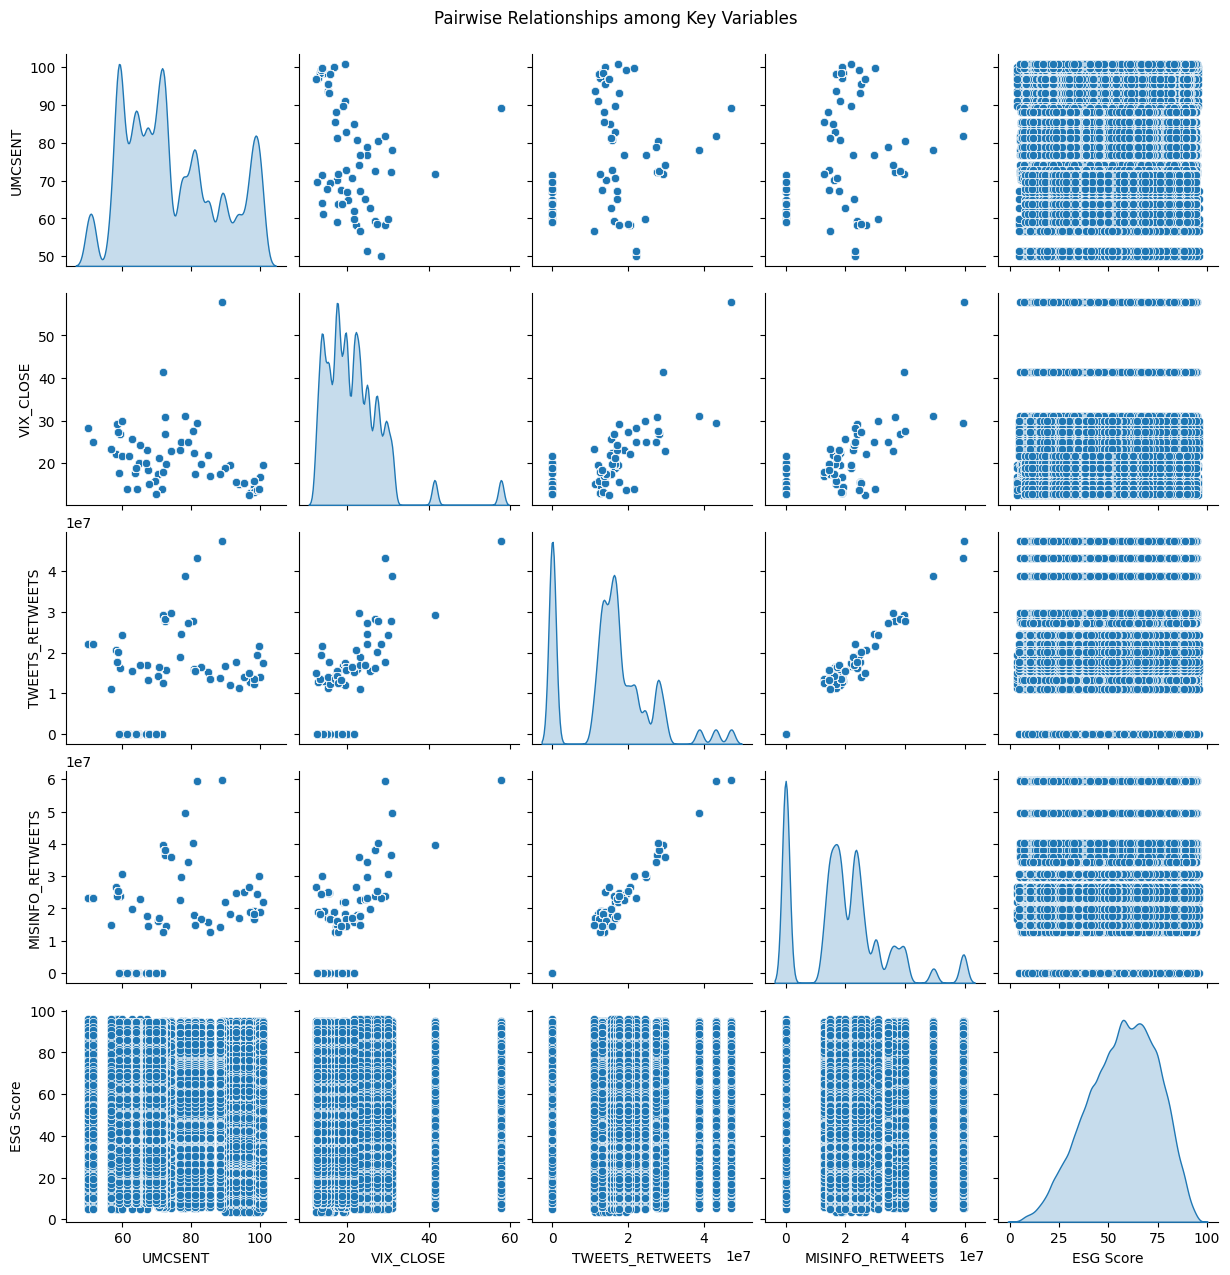

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of numeric features for clarity
features = ['UMCSENT', 'VIX_CLOSE', 'TWEETS_RETWEETS', 'MISINFO_RETWEETS', 'ESG Score']
df_subset = df_merged[features].dropna()

sns.pairplot(df_subset, diag_kind='kde')
plt.suptitle('Pairwise Relationships among Key Variables', y=1.02)
plt.show()


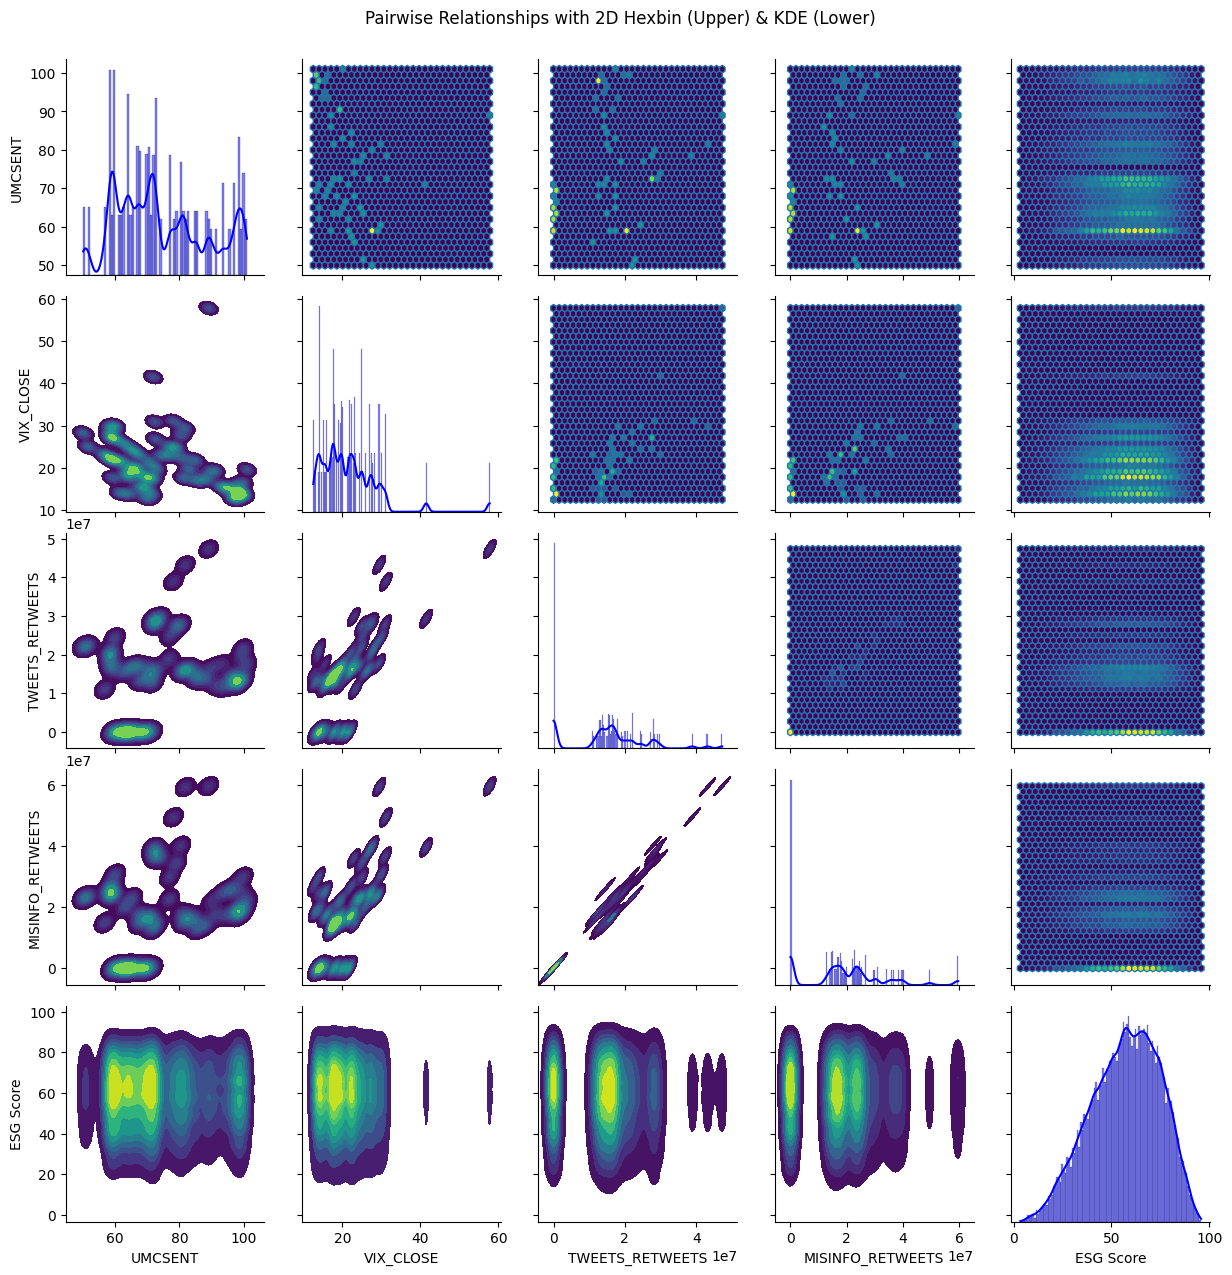

: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Choose a subset of numeric features to visualize
features = ["UMCSENT", "VIX_CLOSE", "TWEETS_RETWEETS", "MISINFO_RETWEETS", "ESG Score"]
df_subset = df_merged[features].dropna()

# 2. Define a custom function for hexbin plotting
def hexbin_func(x, y, **kwargs):
    plt.hexbin(x, y, gridsize=30, cmap="viridis", **kwargs)

# 3. Create the PairGrid
g = sns.PairGrid(df_subset, diag_sharey=False)

# 4. Map the plots
#    - Upper triangle: 2D hexbin to accumulate point density
#    - Lower triangle: KDE contour for a smoothed density estimate
#    - Diagonal: histogram with a kernel density estimate
g.map_upper(hexbin_func)
g.map_lower(sns.kdeplot, fill=True, levels=10, cmap="viridis")
g.map_diag(sns.histplot, kde=True, color="blue")

# 5. Final styling
plt.suptitle("Pairwise Relationships with 2D Hexbin (Upper) & KDE (Lower)", y=1.02)
plt.show()


In [77]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ---------------------------
# 1. Prepare Data
# ---------------------------
# Select features, ensuring we drop rows with missing data
features = ['UMCSENT', 'VIX_CLOSE', 'TWEETS_RETWEETS', 'MISINFO_RETWEETS', 'ESG Score']
df_subset = df_merged[features].dropna()

# Separate the predictor matrix X from the ESG Score (which we can keep aside as y)
X = df_subset.drop(columns=['ESG Score'])
y = df_subset['ESG Score']

# Standardize X before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# 2. Perform PCA
# ---------------------------
pca = PCA(n_components=2)  # or use more components if desired
X_pca = pca.fit_transform(X_scaled)

# Extract explained variance ratio and loadings
explained_variance = pca.explained_variance_ratio_
loadings = pca.components_

# Convert loadings to a more readable DataFrame
loadings_df = pd.DataFrame(loadings, 
                           columns=X.columns, 
                           index=[f'PC{i+1}' for i in range(pca.n_components_)])

# ---------------------------
# 3. Display PCA Details
# ---------------------------
print("Explained Variance Ratio:")
for i, var_ratio in enumerate(explained_variance, start=1):
    print(f"  PC{i}: {var_ratio:.4f}")

print("\nTotal Variance Explained by these components: "
      f"{explained_variance.sum():.4f}")

print("\nPrincipal Component Loadings (Eigenvectors):")
print(loadings_df)

# Optionally, you can merge X_pca back into a DataFrame to inspect or visualize
df_subset['PC1'] = X_pca[:, 0]
df_subset['PC2'] = X_pca[:, 1]
print("\nSample of the transformed data (PC1, PC2) with original ESG Score:")
print(df_subset[['PC1', 'PC2', 'ESG Score']].head())


Explained Variance Ratio:
  PC1: 0.6501
  PC2: 0.2947

Total Variance Explained by these components: 0.9448

Principal Component Loadings (Eigenvectors):
      UMCSENT  VIX_CLOSE  TWEETS_RETWEETS  MISINFO_RETWEETS
PC1  0.113833   0.503458         0.606724          0.604531
PC2  0.886042  -0.440473         0.077808          0.121897

Sample of the transformed data (PC1, PC2) with original ESG Score:
         PC1       PC2  ESG Score
84 -0.224567  1.160297  34.932175
85 -0.224567  1.160297  89.864011
86 -0.224567  1.160297  64.185094
87 -0.224567  1.160297  33.938362
88 -0.224567  1.160297  33.498627


In [70]:
import pandas as pd

# Assume df_merged is our fully merged DataFrame with monthly data and annual ESG merged by year,
# and that it has been truncated to 2019 onward.

# --- Feature Engineering for VIX and UMCSENT ---
# Create 5 bins for VIX_CLOSE and UMCSENT
df_merged['VIX_bin'] = pd.cut(df_merged['VIX_CLOSE'], bins=5)
df_merged['UMCSENT_bin'] = pd.cut(df_merged['UMCSENT'], bins=5)

# Compute average ESG Score for each combination of VIX and UMCSENT bins
avg_esg_vix_umcsent = df_merged.groupby(['VIX_bin', 'UMCSENT_bin'])['ESG Score'].mean().reset_index()

print("Average ESG Score by VIX and UMCSENT bins:")
print(avg_esg_vix_umcsent)

# --- Feature Engineering for Tweet Engagement Measures ---
# Create 5 bins for TWEETS_RETWEETS and MISINFO_RETWEETS
df_merged['TWEETS_RETWEETS_bin'] = pd.cut(df_merged['TWEETS_RETWEETS'], bins=5)
df_merged['MISINFO_RETWEETS_bin'] = pd.cut(df_merged['MISINFO_RETWEETS'], bins=5)

# Compute average ESG Score for each combination of TWEETS_RETWEETS and MISINFO_RETWEETS bins
avg_esg_tweets_misinfo = df_merged.groupby(['TWEETS_RETWEETS_bin', 'MISINFO_RETWEETS_bin'])['ESG Score'].mean().reset_index()

print("\nAverage ESG Score by TWEETS_RETWEETS and MISINFO_RETWEETS bins:")
print(avg_esg_tweets_misinfo)


Average ESG Score by VIX and UMCSENT bins:
             VIX_bin     UMCSENT_bin  ESG Score
0   (12.478, 21.566]  (49.949, 60.2]  57.734715
1   (12.478, 21.566]    (60.2, 70.4]  57.552557
2   (12.478, 21.566]    (70.4, 80.6]  57.006753
3   (12.478, 21.566]    (80.6, 90.8]  56.866615
4   (12.478, 21.566]   (90.8, 101.0]  57.245417
5   (21.566, 30.609]  (49.949, 60.2]  57.176424
6   (21.566, 30.609]    (60.2, 70.4]  57.303487
7   (21.566, 30.609]    (70.4, 80.6]  56.740724
8   (21.566, 30.609]    (80.6, 90.8]  56.740724
9   (21.566, 30.609]   (90.8, 101.0]        NaN
10  (30.609, 39.651]  (49.949, 60.2]        NaN
11  (30.609, 39.651]    (60.2, 70.4]        NaN
12  (30.609, 39.651]    (70.4, 80.6]  56.720014
13  (30.609, 39.651]    (80.6, 90.8]        NaN
14  (30.609, 39.651]   (90.8, 101.0]        NaN
15  (39.651, 48.694]  (49.949, 60.2]        NaN
16  (39.651, 48.694]    (60.2, 70.4]        NaN
17  (39.651, 48.694]    (70.4, 80.6]  56.720014
18  (39.651, 48.694]    (80.6, 90.8]        N

C:\Users\jr24440\AppData\Local\Temp\ipykernel_15756\3907494501.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_esg_vix_umcsent = df_merged.groupby(['VIX_bin', 'UMCSENT_bin'])['ESG Score'].mean().reset_index()
C:\Users\jr24440\AppData\Local\Temp\ipykernel_15756\3907494501.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_esg_tweets_misinfo = df_merged.groupby(['TWEETS_RETWEETS_bin', 'MISINFO_RETWEETS_bin'])['ESG Score'].mean().reset_index()


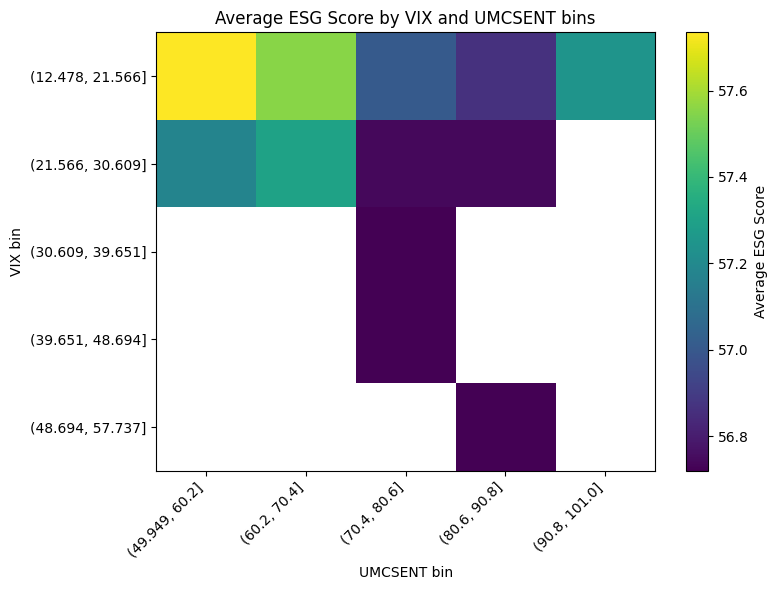

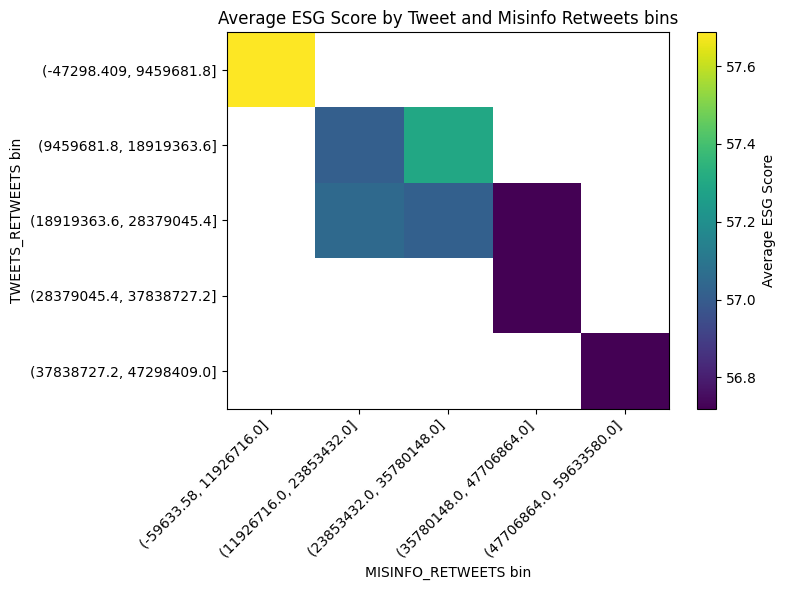

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# --- Heatmap for VIX and UMCSENT bins ---
# Pivot the data so that rows are VIX_bin and columns are UMCSENT_bin
pivot_vix_umcsent = avg_esg_vix_umcsent.pivot(index='VIX_bin', columns='UMCSENT_bin', values='ESG Score')

plt.figure(figsize=(8,6))
# imshow will display the pivoted matrix; we set aspect='auto' to allow flexible sizing
plt.imshow(pivot_vix_umcsent, cmap='viridis', aspect='auto', interpolation='none')
plt.title('Average ESG Score by VIX and UMCSENT bins')
plt.xlabel('UMCSENT bin')
plt.ylabel('VIX bin')
# Use the pivot index and columns for tick labels
plt.xticks(ticks=np.arange(len(pivot_vix_umcsent.columns)), labels=pivot_vix_umcsent.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(pivot_vix_umcsent.index)), labels=pivot_vix_umcsent.index)
plt.colorbar(label='Average ESG Score')
plt.tight_layout()
plt.show()

# --- Heatmap for TWEETS_RETWEETS and MISINFO_RETWEETS bins ---
# Pivot the data so that rows are TWEETS_RETWEETS_bin and columns are MISINFO_RETWEETS_bin
pivot_tweets_misinfo = avg_esg_tweets_misinfo.pivot(index='TWEETS_RETWEETS_bin', columns='MISINFO_RETWEETS_bin', values='ESG Score')

plt.figure(figsize=(8,6))
plt.imshow(pivot_tweets_misinfo, cmap='viridis', aspect='auto', interpolation='none')
plt.title('Average ESG Score by Tweet and Misinfo Retweets bins')
plt.xlabel('MISINFO_RETWEETS bin')
plt.ylabel('TWEETS_RETWEETS bin')
plt.xticks(ticks=np.arange(len(pivot_tweets_misinfo.columns)), labels=pivot_tweets_misinfo.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(pivot_tweets_misinfo.index)), labels=pivot_tweets_misinfo.index)
plt.colorbar(label='Average ESG Score')
plt.tight_layout()
plt.show()


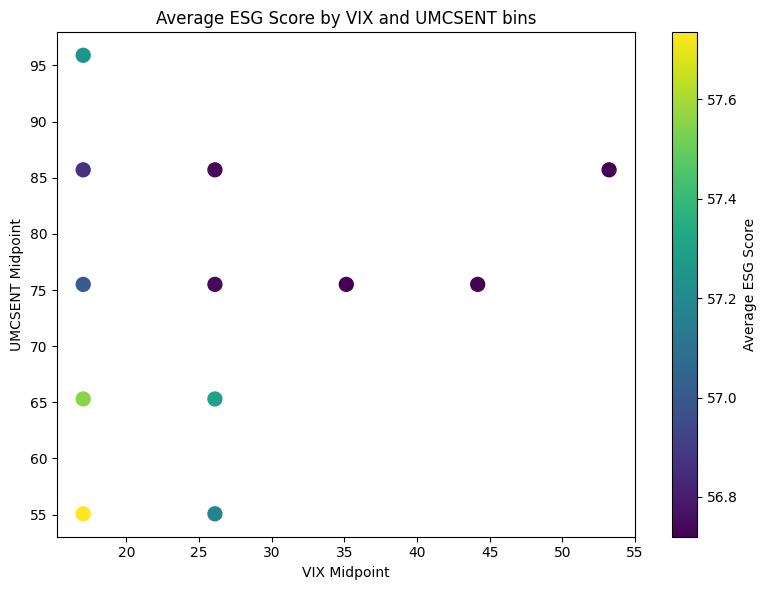

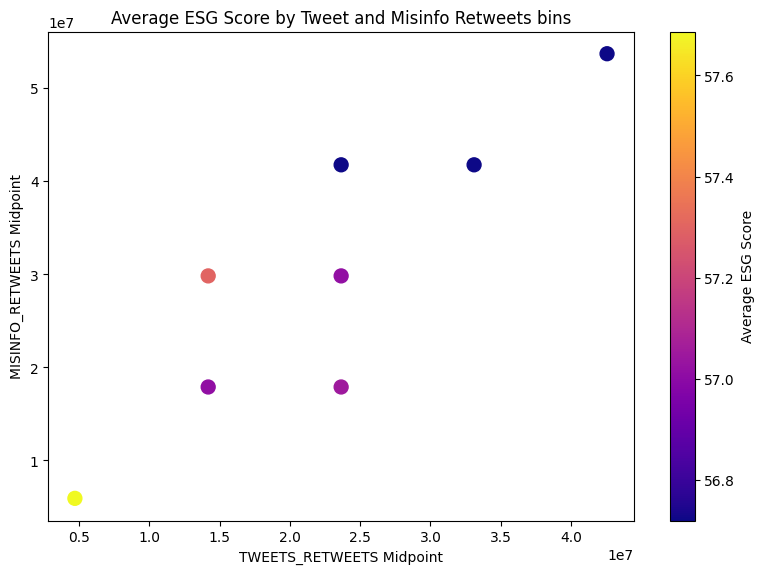

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Function to compute the midpoint of an interval
def midpoint(interval):
    return (interval.left + interval.right) / 2

# --- For VIX and UMCSENT ---
# Drop rows with missing ESG Score and compute midpoints
avg_esg_vix_umcsent_clean = avg_esg_vix_umcsent.dropna(subset=['ESG Score']).copy()
avg_esg_vix_umcsent_clean['VIX_mid'] = avg_esg_vix_umcsent_clean['VIX_bin'].apply(midpoint)
avg_esg_vix_umcsent_clean['UMCSENT_mid'] = avg_esg_vix_umcsent_clean['UMCSENT_bin'].apply(midpoint)

plt.figure(figsize=(8,6))
scatter1 = plt.scatter(avg_esg_vix_umcsent_clean['VIX_mid'],
                       avg_esg_vix_umcsent_clean['UMCSENT_mid'],
                       c=avg_esg_vix_umcsent_clean['ESG Score'],
                       cmap='viridis', s=100)
plt.xlabel('VIX Midpoint')
plt.ylabel('UMCSENT Midpoint')
plt.title('Average ESG Score by VIX and UMCSENT bins')
plt.colorbar(scatter1, label='Average ESG Score')
plt.tight_layout()
plt.show()

# --- For TWEETS_RETWEETS and MISINFO_RETWEETS ---
# Drop rows with missing ESG Score and compute midpoints
avg_esg_tweets_misinfo_clean = avg_esg_tweets_misinfo.dropna(subset=['ESG Score']).copy()
avg_esg_tweets_misinfo_clean['TWEETS_RETWEETS_mid'] = avg_esg_tweets_misinfo_clean['TWEETS_RETWEETS_bin'].apply(midpoint)
avg_esg_tweets_misinfo_clean['MISINFO_RETWEETS_mid'] = avg_esg_tweets_misinfo_clean['MISINFO_RETWEETS_bin'].apply(midpoint)

plt.figure(figsize=(8,6))
scatter2 = plt.scatter(avg_esg_tweets_misinfo_clean['TWEETS_RETWEETS_mid'],
                       avg_esg_tweets_misinfo_clean['MISINFO_RETWEETS_mid'],
                       c=avg_esg_tweets_misinfo_clean['ESG Score'],
                       cmap='plasma', s=100)
plt.xlabel('TWEETS_RETWEETS Midpoint')
plt.ylabel('MISINFO_RETWEETS Midpoint')
plt.title('Average ESG Score by Tweet and Misinfo Retweets bins')
plt.colorbar(scatter2, label='Average ESG Score')
plt.tight_layout()
plt.show()


In [1]:
print(df_merged.head())

NameError: name 'df_merged' is not defined